##**Previsões de fraudes**

##*Esse projeto visa identificar transações fraudulentas.*

Para a resolução dessa problemática o projeto foi dividido nas seguintes etapas:

1.   *Entendimento do problema*
2.   *Obtenção dos dados*
3.   *Analise exploratória e Visualização dos dados*
4.   *Pré-Processamento*
5.   *Modelos de Machine Learning e Avaliação do modelo*






# **1. Entendimento do problema**

Uma empresa de cartão de crédito deseja conseguir reconhecer transações fraudulentas com cartão de crédito para que os clientes não sejam cobrados por itens que não compraram. Sabendo disso, o nosso dever é desenvolver um modelo de Machine Learning que consiga afirmar quais transações são normais e quais são fraudulentas.

# **2. Obtenção dos dados**


**Permitindo o acesso do Google Colab ao Drive**

  Esse passo é necessário para que seja possivel importar dados diretamente do drive

In [ ]:
# Acesso ao drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importando as bibliotecas**

**Para fazer as analises é necessario importar algumas bibliotecas previamente, nesse caso estou importando o pandas para manipulação de dados, também estão sendo importadas o pyplot e o seaborn para visualização dos dados.**

In [ ]:
# Manipulação de dados
import pandas as pd

# Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

**Importação dos dados**

In [ ]:
#Fonte: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
df = pd.read_csv('/content/drive/MyDrive/Dados/creditcard.csv')

# Visualizando as primeiras linhas
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


*No conjunto de dados temos as seguintes variáveis*

* Time : Número de segundos decorridos entre esta transação e a primeira transação no conjunto de dados
* As variáveis V1 até V28 não são detalhadas para proteger as identidades dos usuários.
* Amount : Valor da transação
* Class : 1 para transações fraudulentas, 0 caso contrário.


# **3. Analise exploratória dos dados**





**Objetivos**: 

* Identificar o tipo de cada variável (numérica, categórica, temporal)
* Identificar qual é a variável target (alvo) para o nosso problema
* Exploração dos dados (medidas descritivas, distribuição das variáveis)
* Visualizar os dados para identificar padrões de fraudes

*Com esse conjunto de dados em específico a análise exploratória dos dados está comprometida, pois a maioria dos dados passou por uma redução da dimensionalidade do PCA para proteger identidades de usuários e recursos.*

In [ ]:
# Visão geral dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Observando as dimensões do DataFrame
df.shape

(284807, 31)

É possível observar que esse dataset tem 284807 entradas e 31 colunas.

Os dados se enquadram em duas categorias:

* **Variáveis numéricas**: V1 até V28, Amount e Class.

* **Variáveis temporais**: Time.

**Identificando a variável alvo:**

O objetivo é identificar transações fraudulentas. Assim, a variável **'Class   '** é a variável adequada para alcançar os objetivos propostos.

*Como esse dataset apresenta um número grande de colunas algumas colunas não serão exibidas, então para que isso não aconteça sera necessário utilizar a função set_option*

In [ ]:
# Exibindo todas as colunas do DF
pd.set_option('max_columns', None)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Observando os dados 
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


*Na variavel 'Amount' a maioria dos dados estão concentrados entre 1 e 77,16  tendo como media 88,34 e o valor máximo é 25691.*

*Observando as variáveis numéricas*

In [ ]:
# Instalando e importando o SweetViz
!pip install sweetviz
import sweetviz as sv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Observando os dados
dash = sv.analyze(df, target_feat= 'Class')
dash.show_notebook()

Nesse dataset temos 284,315 transações normais e 492 transações fraudulentas

**Observando a distribuição das variáveis**

In [ ]:
# Criando um gráfico com todas as colunas do dataset
df.hist(figsize=(17,17));

# **4. Pré-Processamento**

Objetivos:

* Eliminar as variáveis que não serão utilizadas;
* Separar amostra dos dados
* Identificação de dados ausentes;
* Remoção de Outliers;
* Escala das variáveis

## **A. Eliminando variavies que não serão utilizadas.**

Aparentemente esse dataset já veio com todas as variáveis categorizadas como importantes para a resolução dessa problemática, então atualmente não tem motivos para excluir nenhuma.

## **B. Separando amostra dos dados.**

*Analisando as dimensões do dataset, percebe-se que ele tem um numero alto de registtros e como boa parte dos modelos de machine learning voltados para classificação são conhecidos como lazy learning e vai ser utilizado , é necessario pegar apenas uma amostra de todos os dados para que os modelos não levem tanto tempo para fazer as predições.*

In [ ]:
# Criando um novo DF e utilizando o sample para pegar 25% dos dados, sem reposição.
amostra_df = df.sample(frac = 0.25)

In [ ]:
# Observando as dimensões do novo DataFrame
amostra_df.shape

(71202, 31)

##**C. Identificação dados ausentes.**



*Verificando quais as variáveis que tem dados faltantes.*

In [ ]:
# Observando dados faltantes e ordenando em ordem decrescente
def soma_ausentes(df):
    p_faltantes = df.isnull().sum()
    valores_faltantes = pd.DataFrame({'Variavéis': df.columns, 
                                           'Soma de ausentes': p_faltantes}
                                      ).reset_index(drop = True)
        
    return valores_faltantes.sort_values(by = ['Soma de ausentes'], ascending = False) 

soma_ausentes(amostra_df)

*Não existem valores ausentes, então não haverá necessidade de nenhum tratamento desse tipo.*

## **D. Remoção de outliers.**



*Como esse problema se trata da detecção de fraudes, e a maioria de suas variáveis não estão especificadas por se tratar de dados sensíveis, optei por não excluir os outliers, pois pode acontecer de algum outlier representar uma fraude e caso esse outlier for tratado consequentemente um componente importante para a predição do modelo seria perdido, dito isso não será feito nenhuma remoção de outliers.*

## **E. Escala das Variáveis.**

**Processamento das variáveis numéricas:**

Como as variáveis estão em escalas diferentes, isso pode acabar causando problemas nos modelos de Machine Learning, dessa forma o próximo passo vai ser padronizar os dados
das variáveis.

In [ ]:
# Biblioteca para fazer a PADRONIZAÇÃO
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


# Padronização dos dados da amostra
amostra_df[['Time',	'Amount']] = sc.fit_transform(amostra_df[['Time',	'Amount']])

# Padronização dos dados completos
df[['Time',	'Amount']] = sc.fit_transform(df[['Time',	'Amount']])

In [ ]:
df.head()

In [ ]:
amostra_df.head()

# **5. Modelos de Machine Learning**

Com a etapa e pré-processamento concluída, o próximo passo é a modelagem.

**Objetivos:**

* Definir quais os modelos serão utilizados;
* Selecionar o melhor modelo;
* Avaliar os modelos;
* Aplicar  o Oversample;

**Importando os modelos que serão usados**

In [ ]:
# Importações dos modelos que serão utilizados
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier 

**Fazendo as demais importções**



In [ ]:
# Biblioteca algebra linear
import numpy as np

# Importando métricas de validação
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

# Biblioteca para observação de métricas
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve

# Tunagem de hiperparametros
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Criando a validação
validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 2)

**Iniciando a escolha do melhor modelo**

Etapas:

* Separar os dados em variável preditora e a variável resposta;
* Definir uma lista de medidas;
* Criar uma lista de modelos;
* Renomear a lista de modelos;
* Criar um laço de repetição para exibir os modelos que estão sendo executados, aplicar uma validação cruzada para cada modelo presente na lista de modelos, tendo como argumento para o 'cv' a validação criada acima e o 'scoring', vai receber a lista de medidas que foi criado e por último exibir as métricas para seus respectivos modelos;

**Separando os dados da amostra para identificação dos melhores modelos**

In [ ]:
# Separando os dados da amostra em X e Y

# Variaveis preditoras
X = amostra_df.drop('Class', axis = 1)

# Variavel resposta
y = amostra_df['Class']

In [ ]:
# Criando uma lista com as medidas que serão analisadas
lista_de_medidas = ['accuracy', 'recall', 'precision', 'balanced_accuracy', 'f1']

# Lista com o nome das medidas
nome_das_medidas = ['acurácia', 'sensibilidade', 'precisão', 'eficiência', 'f1-score']

# Criando uma lista com modelos selecionados
lista_de_modelos = [
                        DecisionTreeClassifier(max_depth = 3),
                        DecisionTreeClassifier(max_depth = 5),
                        DecisionTreeClassifier(max_depth = 7),
                        BaggingClassifier(),
                        RandomForestClassifier(n_estimators=50, max_depth = 5),
                        RandomForestClassifier(n_estimators=50, max_depth = 7),
                        RandomForestClassifier(n_estimators=100, max_depth = 5),
                        RandomForestClassifier(n_estimators=100, max_depth = 7),
                        RandomForestClassifier(n_estimators=150, max_depth = 5),
                        RandomForestClassifier(n_estimators=150, max_depth = 7)]

# Criando uma lista com os nomes dos modelos
nome_dos_modelos = [
                        'Árvore (prof = 3)',
                        'Árvore (prof = 5)',
                        'Árvore (prof = 7)',
                        'Bagging',
                        'Random Forest (arvs = 50, prof = 5)',
                        'Random Forest (arvs = 50, prof = 7)',
                        'Random Forest (arvs = 100, prof = 5)', 
                        'Random Forest (arvs = 100, prof = 7)',
                        'Random Forest (arvs = 150, prof = 5)', 
                        'Random Forest (arvs = 150, prof = 7)']

resultados0 = {}

for i in range(len(lista_de_modelos)):

    print('Rodando modelo: ' + nome_dos_modelos[i])

    accs_vc = cross_validate(lista_de_modelos[i], X, y, cv = validacao, scoring = lista_de_medidas)

    acc = accs_vc['test_accuracy'].mean()
    sen = accs_vc['test_recall'].mean()
    vpp = accs_vc['test_precision'].mean()
    bac = accs_vc['test_balanced_accuracy'].mean()
    f1s = accs_vc['test_f1'].mean()

    resultados0[nome_dos_modelos[i]] = [acc, sen, vpp, bac, f1s]
    
    
resultados = pd.DataFrame(resultados0, index = nome_das_medidas).T

Rodando modelo: Árvore (prof = 3)
Rodando modelo: Árvore (prof = 5)
Rodando modelo: Árvore (prof = 7)
Rodando modelo: Bagging
Rodando modelo: Random Forest (arvs = 50, prof = 5)
Rodando modelo: Random Forest (arvs = 50, prof = 7)
Rodando modelo: Random Forest (arvs = 100, prof = 5)
Rodando modelo: Random Forest (arvs = 100, prof = 7)
Rodando modelo: Random Forest (arvs = 150, prof = 5)
Rodando modelo: Random Forest (arvs = 150, prof = 7)


*Agora que todos os modelos da lista foram testados hora de observar o melhor modelo, como estamos lidando com dados desbalanceados a acurácia não vai ser a nossa principal métrica de validação e sim o F1-Score que é uma média harmônica entre a precisão e a sensibilidade.*

In [ ]:
resultados.sort_values(by = 'f1-score', ascending = False)

,acurácia,sensibilidade,precisão,eficiência,f1-score
"Random Forest (arvs = 150, prof = 7)",0.999277,0.708810,0.915210,0.854331,0.790290
"Random Forest (arvs = 50, prof = 7)",0.999270,0.703095,0.913568,0.851477,0.788152
"Random Forest (arvs = 50, prof = 5)",0.999228,0.685238,0.907924,0.842545,0.776405
"Random Forest (arvs = 100, prof = 5)",0.999242,0.679762,0.916702,0.839818,0.775493
Bagging,0.999185,0.716429,0.857313,0.858088,0.775400
"Random Forest (arvs = 100, prof = 7)",0.999242,0.690476,0.908033,0.845168,0.771916
"Random Forest (arvs = 150, prof = 5)",0.999221,0.677619,0.918665,0.838739,0.769258
Árvore (prof = 5),0.999164,0.699762,0.858529,0.849761,0.763360
Árvore (prof = 3),0.999129,0.695476,0.844865,0.847604,0.753364
Árvore (prof = 7),0.999059,0.655476,0.847689,0.827608,0.725874


**Considerando a vital importância das métricas para avaliação dos modelos, vou utilizar uma função para exibir as métricas dos modelos criados em comparação com dados ainda não visto pelos modelos.**

In [ ]:
# Criando função para visualizar as métricas dos modelos
def metricas(real, preditos):
    print("acurácia: {:.3f}".format(accuracy_score(real, preditos)))
    print("precisão: {:.3f}".format(precision_score(real, preditos)))
    print("sensibilidade: {:.3f}".format(recall_score(real, preditos)))
    print("f1-score: {:.3f}".format(f1_score(real, preditos)))

**A curva ROC vai ser uma das métricas que será utilizada para avaliação do modelo, sendo assim uma função para a exibição da curva também vai ser criada.**

In [ ]:
# Criando função para exibir a curva ROC
def plot_curva_roc(x, y):
    plt.plot(x, y, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()

**Separando os dados completo do DF**

In [ ]:
# Separando os dados do DF completo em X e Y para as criações dos modelos

# Variaveis preditoras
X = df.drop('Class', axis = 1)

# Variavel resposta
y = df['Class']

*Importando biblioteca para separação de dados*

In [ ]:
# Bilioteca para separação de dados em treino e teste
from sklearn.model_selection import train_test_split

# Separando os dados
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3)

**Com os dados já separados entre treino e teste, agora sera feita a criação, treinamento e avaliação dos modelos**

**Criando o modelo que obteve o melhor F1-Score**

In [ ]:
# Criando o modelo
modelo_rf = RandomForestClassifier(n_estimators=150, max_depth = 7)

# Treinando o modelo
modelo_rf.fit(X_treino, y_treino)

RandomForestClassifier(max_depth=7, n_estimators=150)

**Fazendo as previsões nos dados de teste e criando uma matriz de confusão para avaliar o desempenho do modelo**

In [ ]:
# Fazendo as previsões
pred = modelo_rf.predict(X_teste)

# Observando a matriz de confusão
print(pd.crosstab(y_teste,pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      0    1    All
Real                      
0        85286   10  85296
1           36  111    147
All      85322  121  85443


**Observando as métricas do modelo**

In [ ]:
# observando as métricas do modelo, em comparação com novos dados
metricas(y_teste, pred.round())

acurácia: 0.999
precisão: 0.917
sensibilidade: 0.755
f1-score: 0.828


*Utilizando a Curva ROC para avaliar o desempenho do modelo*

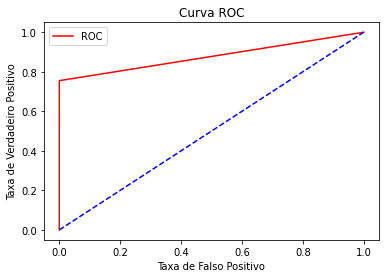

In [ ]:
# Fazendo as comparações e exibindo o gráfico da curva
x, y, thresholds = roc_curve(y_teste, pred)
plot_curva_roc(x, y)

**Criando o segundo melhor modelo**

In [ ]:
# Criando o modelo
modelo_rf2 = RandomForestClassifier(n_estimators=50, max_depth = 7)

# Treinando o modelo
modelo_rf2.fit(X_treino, y_treino)

RandomForestClassifier(max_depth=7, n_estimators=50)

**Fazendo as previsões nos dados de teste e criando uma matriz de confusão para avaliar o desempenho do modelo**

In [ ]:
# Fazendo as previsões
rf2_pred = modelo_rf2.predict(X_teste)

# Observando a matriz de confusão
print(pd.crosstab(y_teste,rf2_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      0    1    All
Real                      
0        85287    9  85296
1           34  113    147
All      85321  122  85443


**Observando as métricas do modelo**

In [ ]:
# Observando as métricas do modelo, em comparação com novos dados
metricas(y_teste, rf2_pred.round())

acurácia: 0.999
precisão: 0.926
sensibilidade: 0.769
f1-score: 0.840


*Utilizando a Curva ROC para avaliar o desempenho do modelo*

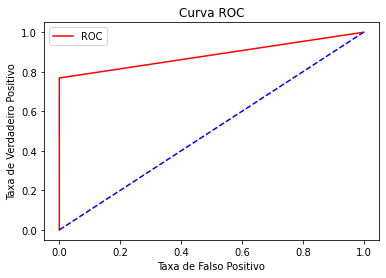

In [ ]:
# Fazendo as comparações e exibindo o gráfico da curva
x, y, thresholds = roc_curve(y_teste, rf2_pred)
plot_curva_roc(x, y)

##**Utilizando o Oversample**

**Pelo fato da variável alvo ser desbalanceada ela acaba comprometendo o desempenho do modelo, sendo assim utilizarei a técnica do oversample SMOTE que consiste em balancear a classe positiva da variável que nesse caso se chama 'Class'.**

In [ ]:
# Fazendo a importação do oversample
from imblearn.over_sampling import SMOTE

# Balanceamento da classe (Class)
oversample = SMOTE()

# Aplicando os registros da classe balanceada
X_over, y_over = oversample.fit_resample(X_treino, y_treino)

**Criando e treinando o modelo com a classe balanceada**

In [ ]:
# Criando o modelo
modelo = RandomForestClassifier()

# Treinando o modelo
modelo.fit(X_over, y_over)

RandomForestClassifier()

**Fazendo as previsões nos dados de teste e criando uma matriz de confusão para avaliar o desempenho do modelo**

In [ ]:
# Fazendo as predições
y_predito = modelo.predict(X_teste)

# Observando a matriz de confusão
print(pd.crosstab(y_teste,y_predito, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      0    1    All
Real                      
0        85282   14  85296
1           29  118    147
All      85311  132  85443


**Observando as métricas do modelo**

In [ ]:
# Observando as métricas do modelo, em comparação com novos dados
metricas(y_teste, y_predito)

acurácia: 0.999
precisão: 0.894
sensibilidade: 0.803
f1-score: 0.846


*Utilizando a Curva ROC para avaliar o desempenho do modelo*

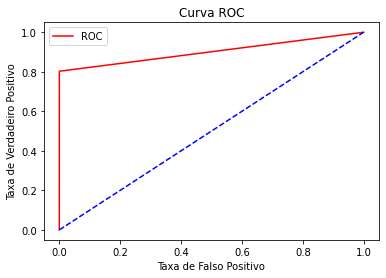

In [ ]:
# Observando o gráfico da curva ROC
x, y, thresholds = roc_curve(y_teste, y_predito)
plot_curva_roc(x, y)

**O modelo com os dados balanceados apresentou melhores métricas, sendo assim ele sera o modelo final.**

**Verificando quais foram as variáveis mais importantes para as predições.**

In [ ]:
#Analisando a importância de cada variável
modelo.feature_importances_

feature_importances = pd.DataFrame(modelo.feature_importances_, index = X_treino.columns, columns=['Importância']).sort_values('Importância',ascending=False)
feature_importances

,Importância
V14,0.182165
V10,0.108283
V12,0.106433
V4,0.097620
V17,0.091092
V11,0.070966
V3,0.050285
V16,0.047964
V7,0.028531
V2,0.025217


##**Criando um segundo modelo com a classe já balanceada**

In [ ]:
# Criando o modelo
modelo2 = RandomForestClassifier(n_estimators=150, max_depth = 7)

# Treinando o modelo
modelo2.fit(X_over, y_over)

RandomForestClassifier(max_depth=7, n_estimators=150)

**Fazendo as previsões nos dados de teste e criando uma matriz de confusão para avaliar o desempenho do modelo**

In [ ]:
# Fazendo as predições
y_predito2 = modelo2.predict(X_teste)

# Observando a matriz de confusão
print(pd.crosstab(y_teste,y_predito2, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      0    1    All
Real                      
0        85118  178  85296
1           18  129    147
All      85136  307  85443


**Observando as métricas do modelo**

In [ ]:
# Observando as métricas
metricas(y_teste, y_predito2)

acurácia: 0.998
precisão: 0.420
sensibilidade: 0.878
f1-score: 0.568


*Utilizando a Curva ROC para avaliar o desempenho do modelo*

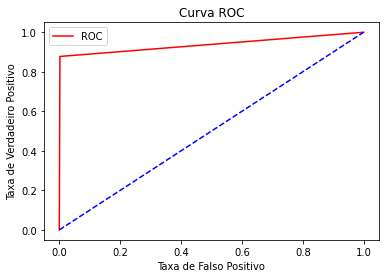

In [ ]:
# Observando o gráfico da curva ROC
x, y, thresholds = roc_curve(y_teste, y_predito2)
plot_curva_roc(x, y)

*Esse modelo em específico tem uma peculiaridade interessante, já que foi o modelo que teve a maior taxa de verdadeiros positivos, ou seja, foi o modelo que mais detectou fraudes quando realmente eram fraudes, no entanto, ele também foi o modelo que mais apresentou falsos positivos, que é quando o modelo previu fraude quando na realidade era uma transação normal.*

**Como o primeiro modelo com classes balanceadas apresentou uma melhor performance ele que sera utilizado para prever as possiveis transações fraudulentas na base de dados.**

In [ ]:
# Atribuindo a probabilidade de falecimento para cada paciente presente na base de dados
df['Proba'] = modelo.predict_proba(X[X_treino.columns])[:,1]

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Proba
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0,0.0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0,0.0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0,0.0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0,0.0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0,0.0


**Conclusão**

* O melhor modelo foi um RandomForestClassifier com um Oversample.

* A variável mais importantes foi a 'V14', seguido pela 'V10' e 'V12'.

* Agora que já temos como identificar com certeza cerca de 80% das transações fraudulentas, medidas preventivas podem ser tomadas para mitigar esse tipo de problema.